# Chapter 2:

In [2]:
import networkx as nx

G = nx.Graph()

G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])
G

In [3]:
def bfs(graph, node):
    visited, queue = [node], [node]
    while queue:
        node = queue.pop(0)

        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)
    return visited

In [4]:
bfs(G, 'A')

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [6]:
visited = []

def dfs(visited, graph, node):
    if node not in visited:
        visited.append(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited = dfs(visited, graph, neighbor)
    return visited

In [9]:
dfs(visited, G, 'A')

['A', 'B', 'D', 'E', 'C', 'F', 'G']

# Chapter 3:

## Skipgram:

In [5]:
import numpy as np

CONTEXT_SIZE = 2

text = """Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc eu sem 
scelerisque, dictum eros aliquam, accumsan quam. Pellentesque tempus, lorem ut 
semper fermentum, ante turpis accumsan ex, sit amet ultricies tortor erat quis 
nulla. Nunc consectetur ligula sit amet purus porttitor, vel tempus tortor 
scelerisque. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices 
posuere cubilia curae; Quisque suscipit ligula nec faucibus accumsan. Duis 
vulputate massa sit amet viverra hendrerit. Integer maximus quis sapien id 
convallis. Donec elementum placerat ex laoreet gravida. Praesent quis enim 
facilisis, bibendum est nec, pharetra ex. Etiam pharetra congue justo, eget 
imperdiet diam varius non. Mauris dolor lectus, interdum in laoreet quis, 
faucibus vitae velit. Donec lacinia dui eget maximus cursus. Class aptent taciti
sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Vivamus
tincidunt velit eget nisi ornare convallis. Pellentesque habitant morbi 
tristique senectus et netus et malesuada fames ac turpis egestas. Donec 
tristique ultrices tortor at accumsan.
""".split()



In [6]:
np.arange(1-CONTEXT_SIZE, 1+CONTEXT_SIZE+1)

array([-1,  0,  1,  2,  3])

In [7]:
range(CONTEXT_SIZE, len(text)-CONTEXT_SIZE)

range(2, 154)

In [8]:
skipgrams = []

for i in range(CONTEXT_SIZE, len(text)-CONTEXT_SIZE):
    array = [text[j] for j in np.arange(i-CONTEXT_SIZE, i+CONTEXT_SIZE+1) if j!=i]
    skipgrams.append([text[i], array])

skipgrams

[['dolor', ['Lorem', 'ipsum', 'sit', 'amet,']],
 ['sit', ['ipsum', 'dolor', 'amet,', 'consectetur']],
 ['amet,', ['dolor', 'sit', 'consectetur', 'adipiscing']],
 ['consectetur', ['sit', 'amet,', 'adipiscing', 'elit.']],
 ['adipiscing', ['amet,', 'consectetur', 'elit.', 'Nunc']],
 ['elit.', ['consectetur', 'adipiscing', 'Nunc', 'eu']],
 ['Nunc', ['adipiscing', 'elit.', 'eu', 'sem']],
 ['eu', ['elit.', 'Nunc', 'sem', 'scelerisque,']],
 ['sem', ['Nunc', 'eu', 'scelerisque,', 'dictum']],
 ['scelerisque,', ['eu', 'sem', 'dictum', 'eros']],
 ['dictum', ['sem', 'scelerisque,', 'eros', 'aliquam,']],
 ['eros', ['scelerisque,', 'dictum', 'aliquam,', 'accumsan']],
 ['aliquam,', ['dictum', 'eros', 'accumsan', 'quam.']],
 ['accumsan', ['eros', 'aliquam,', 'quam.', 'Pellentesque']],
 ['quam.', ['aliquam,', 'accumsan', 'Pellentesque', 'tempus,']],
 ['Pellentesque', ['accumsan', 'quam.', 'tempus,', 'lorem']],
 ['tempus,', ['quam.', 'Pellentesque', 'lorem', 'ut']],
 ['lorem', ['Pellentesque', 'tempus,'

In [9]:
vocab = set(text)

VOCAB_SIZE = len(vocab)

print(f"Length of vocabulary = {VOCAB_SIZE}")

Length of vocabulary = 121


In [10]:
N=10

In [11]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec([text],
                 sg=1,
                 vector_size=10,
                 min_count=0,
                 window=2,
                 workers=2,
                 seed=0)

In [12]:
print(f"Shape of W_embed: {model.wv.vectors.shape}")

Shape of W_embed: (121, 10)


In [13]:
model.train([text], total_examples=model.corpus_count, epochs=10)

(690, 1560)

In [14]:
print("Word embedding =")
print(model.wv[0])

Word embedding =
[ 0.07156403  0.03257632  0.00209916 -0.04374931 -0.03398107 -0.08656936
 -0.09047253 -0.0955243  -0.06482638  0.0660186 ]


## Random walk

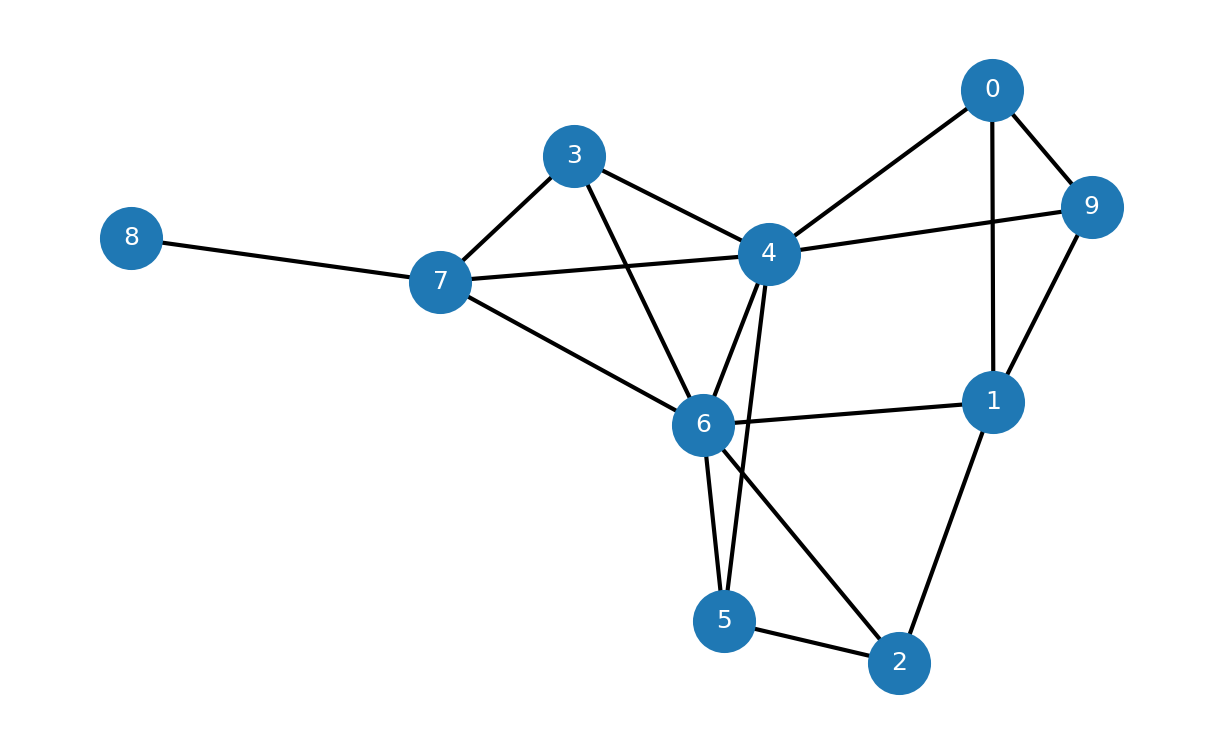

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(0)

G = nx.erdos_renyi_graph(10, 0.3, seed=1, directed = False)

plt.figure(dpi=300, figsize=[5,3])
plt.axis('off')

nx.draw_networkx(G,
                 pos=nx.spring_layout(G,seed=0),
                 node_size=200,
                 cmap='coolwarm',
                 font_size=6,
                 font_color='white'
                 )

In [24]:
def random_walk(start, length):
    walk = [str(start)] # starting node

    for i in range(length):
        neighbors = [node for node in G.neighbors(start)]
        next_node = np.random.choice(neighbors, 1)[0]
        walk.append(str(next_node))
        start = next_node

    return walk


In [25]:
print(random_walk(0, 10))

['0', '9', '4', '3', '6', '4', '7', '8', '7', '6', '4']


## Implementing DeepWalk:

In [34]:
G = nx.karate_club_graph()

In [35]:
labels = []

for node in G.nodes:
    label = G.nodes[node]['club']
    labels.append(1 if label == 'Officer' else 0)

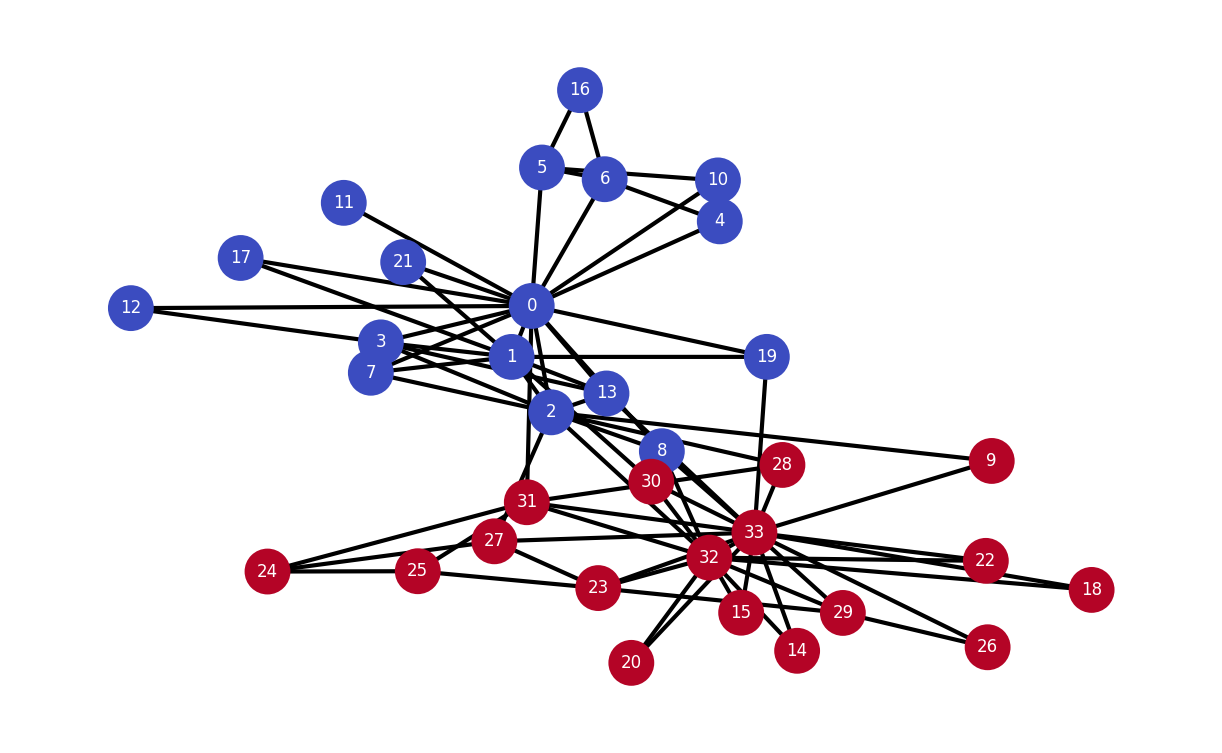

In [36]:
plt.figure(dpi=300, figsize=[5,3])
plt.axis('off')

nx.draw_networkx(G,
                 pos=nx.spring_layout(G,seed=0),
                 node_color=labels,
                 node_size=100,
                 cmap='coolwarm',
                 font_size=4,
                 font_color='white'
                 )

In [37]:
walks = []
random_walk_num = 80
walk_size = 10
for node in G.nodes:
    for _ in range(random_walk_num):
        walks.append(random_walk(node, walk_size))

In [38]:
print(walks[0])

['0', '31', '24', '27', '33', '29', '23', '25', '31', '28', '33']


In [39]:
model = Word2Vec(walks,
                 hs=1,
                 sg=1,
                 vector_size=100,
                 window=10,
                 workers=2,
                 seed=0
                 )

In [40]:
model.train(walks, total_examples=model.corpus_count, epochs=30, report_delay=1)

(186772, 897600)

In [41]:
print('Nodes that are the most similar to node 0:')
for similarity in model.wv.most_similar(positive=['0']):
    print(f'     {similarity}')

Nodes that are the most similar to node 0:
     ('4', 0.7058767676353455)
     ('21', 0.6604698300361633)
     ('10', 0.6261380314826965)
     ('6', 0.6150196194648743)
     ('5', 0.6014366745948792)
     ('11', 0.5986406207084656)
     ('1', 0.5760220885276794)
     ('17', 0.5677155256271362)
     ('7', 0.5392574667930603)
     ('16', 0.5316615104675293)


In [42]:
# Similarity between  two nodes:

print(f"Similarity between node 0 and 4: {model.wv.similarity('0', '4')}")

Similarity between node 0 and 4: 0.7058767676353455


In [43]:
from sklearn.manifold import TSNE

nodes_wv = np.array([model.wv.get_vector(str(i)) for i in range(len(model.wv))])
labels = np.array(labels)

In [44]:
tsne = TSNE(n_components=2,
            learning_rate='auto',
            init='pca',
            random_state=0). fit_transform(nodes_wv)

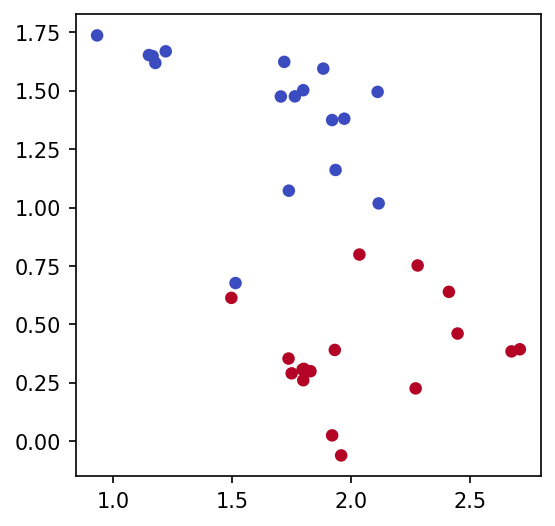

In [51]:
plt.figure(figsize=[4,4], dpi=150)

plt.scatter(tsne[:,0], tsne[:,1], s=25, c=labels, cmap='coolwarm')
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

train_mask = list(np.arange(0, len(G.nodes), 2))
test_mask = list(np.arange(1, len(G.nodes), 2))

In [57]:
print(f"train_mask: {train_mask}")
print(f"test_mask: {test_mask}")

train_mask: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]
test_mask: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33]


In [58]:
clf = RandomForestClassifier(random_state=0)
clf.fit(nodes_wv[train_mask], labels[train_mask])

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = clf.predict(nodes_wv[test_mask])
acc = accuracy_score(y_pred, labels[test_mask])
print(f"Accuracy: {acc}")

Accuracy: 1.0


In [60]:
# Example from book
train_mask = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
test_mask = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30, 31, 32, 33]

In [61]:
clf = RandomForestClassifier(random_state=0)
clf.fit(nodes_wv[train_mask], labels[train_mask])

RandomForestClassifier(random_state=0)

In [62]:
y_pred = clf.predict(nodes_wv[test_mask])
acc = accuracy_score(y_pred, labels[test_mask])
print(f"Accuracy: {acc}")

Accuracy: 0.9473684210526315


# Chapter 4

## Introducing biased random walks

In [63]:
import networkx as nx
import random
random.seed(0)

import numpy as np
np.random.seed(0)

G = nx.erdos_renyi_graph(10,0.3, seed=1,directed=False)

In [64]:
def next_node(previous, current, p, q):
    neighbors = list(G.neighbors(current))
    alphas = []
    for neighbor in neighbors:
        if neighbor == previous:
            alpha = 1/p
        elif G.has_edge(neighbor, previous):
            alpha = 1
        else:
            alpha = 1/q
        alphas.append(alpha)
    
    probs = [alpha/sum(alphas) for alpha in alphas]

    next = np.random.choice(neighbors, size=1, p=probs)[0]

    return next


In [65]:
def random_walk(start, length, p, q):
    walk=[start]

    for i in range(length):
        current = walk[-1]
        previous = walk[-2] if len(walk) > 1 else None
        next = next_node(previous, current, p, q)
        walk.append(next)
    
    return [str(x) for x in walk]

In [ ]:
random_walk(0, 8, p=1, q=1) # With p and q = 1 it's the same as deepwalk, all transitions have the same probabilities

['0', '4', '7', '6', '4', '5', '4', '5', '6']

In [ ]:
random_walk(0, 8, p=1, q=10) # now it's biased to going back to the previous node with q=10

['0', '9', '1', '9', '1', '9', '1', '0', '1']

In [69]:
random_walk(0, 8, p=10, q=1) # now it's biased to explore more nodes with p=10

['0', '1', '9', '4', '7', '8', '7', '4', '6']

## Implementing Node2Vec

In [70]:
from gensim. models.word2vec import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

G = nx.karate_club_graph()

In [ ]:
labels = []
for node in G.nodes():
    label = G.nodes[node]['club']
    labels.append(1 if label == "Officer" else 0)

In [76]:
random_walk_num = 80
walk_size = 10
p = 3
q = 2
walks = []
vector_size=100
N=10

for node in G.nodes():
    for _ in range(random_walk_num):
        walks.append(random_walk(node, walk_size, p, q))


In [78]:
node2vec = Word2Vec(walks,
                    hs=1,
                    sg=1,
                    vector_size=vector_size,
                    window=N,
                    workers=2,
                    min_count=1,
                    seed=0)

In [79]:
node2vec.train(walks, total_examples=node2vec.corpus_count, epochs=30, report_delay=1)

(185911, 897600)

In [80]:
# Example from book
train_mask = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
test_mask = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30, 31, 32, 33]

train_mask_str = [str(x) for x in train_mask]
test_mask_str = [str(x) for x in test_mask]
labels = np.array(labels)

In [81]:
clf = RandomForestClassifier(random_state=0)
clf.fit(node2vec.wv[train_mask_str], labels[train_mask])

RandomForestClassifier(random_state=0)

In [82]:
y_pred = clf.predict(node2vec.wv[test_mask_str])
acc=accuracy_score(y_pred, labels[test_mask])
print(f"Node2Vec accuracy = {acc*100:.2f}%")

Node2Vec accuracy = 94.74%


## Building a movie RecSys

In [83]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

url = 'https://files.grouplens.org/datasets/movielens/ml-100k.zip'
with urlopen(url) as zurl:
    with ZipFile(BytesIO(zurl.read())) as zfile:
        zfile.extractall('.')


In [84]:
import pandas as pd

ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'])
ratings

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [85]:
movies = pd.read_csv('ml-100k/u.item', sep='|', usecols=range(2), names=['movie_id', 'title'], encoding='latin-1')
movies

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [86]:
ratings = ratings[ratings['rating']>=4]

In [87]:
ratings

,user_id,movie_id,rating,unix_timestamp
5,298,474,4,884182806
7,253,465,5,891628467
11,286,1014,5,879781125
12,200,222,5,876042340
16,122,387,5,879270459
...,...,...,...,...
99988,421,498,4,892241344
99989,495,1091,4,888637503
99990,806,421,4,882388897
99991,676,538,4,892685437


In [88]:
from collections import defaultdict

pairs = defaultdict(int)

In [93]:
for group in ratings.groupby("user_id"):
    user_movies = list(group[1]["movie_id"])
    for i in range(len(user_movies)):
        for j in range(i+1, len(user_movies)):
            pairs[(user_movies[i], user_movies[j])]+=1

In [94]:
pairs

defaultdict(int,
            {(61, 33): 4,
             (61, 160): 6,
             (61, 20): 4,
             (61, 202): 4,
             (61, 171): 6,
             (61, 265): 8,
             (61, 47): 5,
             (61, 222): 2,
             (61, 253): 1,
             (61, 113): 3,
             (61, 227): 3,
             (61, 90): 2,
             (61, 64): 10,
             (61, 228): 8,
             (61, 121): 4,
             (61, 114): 2,
             (61, 132): 9,
             (61, 134): 10,
             (61, 98): 13,
             (61, 186): 9,
             (61, 221): 5,
             (61, 84): 1,
             (61, 60): 18,
             (61, 177): 7,
             (61, 174): 12,
             (61, 82): 5,
             (61, 56): 12,
             (61, 80): 1,
             (61, 229): 2,
             (61, 235): 2,
             (61, 6): 2,
             (61, 206): 2,
             (61, 76): 1,
             (61, 72): 2,
             (61, 185): 11,
             (61, 96): 8,
             (61, 25

In [96]:
G = nx.Graph()

score_connection_threshold = 20
for pair in pairs:
    movie1, movie2 = pair
    score = pairs[pair]
    if score >= score_connection_threshold:
        G.add_edge(movie1, movie2, weight=score)

In [ ]:
len(G.nodes) # nodes

410

In [ ]:
G.size() # edges

14936

In [103]:
from node2vec import Node2Vec
import os
num_cores = os.cpu_count()
print(f"num_cores: {num_cores}")

node2vec = Node2Vec(G, dimensions=64, walk_length=20, num_walks=200, p=2, q=1, workers=num_cores)

# window of 10: 5 nodes before and 5 nodes after
model = node2vec.fit(window=10, min_count=1, batch_words=4)

num_cores: 32


Generating walks (CPU: 32): 100%|██████████| 6/6 [00:00<00:00,  7.96it/s]


In [116]:
def recommend(movie):
    print(movies[movies["title"] == movie].movie_id.values[0])
    movie_id = str(movies[movies["title"] == movie].movie_id.values[0])
    for id in model.wv.most_similar(movie_id)[:5]:
        title = movies[movies["movie_id"]==int(id[0])].title.values[0]
        print(f"{title}: {id[1]:.2f}")
    

In [117]:
recommend('Star Wars (1977)')

50
Return of the Jedi (1983): 0.57
Raiders of the Lost Ark (1981): 0.56
Fargo (1996): 0.51
Restoration (1995): 0.50
Toy Story (1995): 0.50


# Chapter 5

## Including Node Features with Vanilla Neural Networks

In [1]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root=".", name="Cora")
data = dataset[0]

Processing...
Done!


In [5]:
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [6]:
print(f"Dataset: {dataset}")
print("-------------------")
print(f"Number of graphs: {len(dataset)}")
print(f"Number of nodes: {data.x.shape[0]}")
print(f"Number of features: {dataset.num_features}")
print(f"Number of classes: {dataset.num_classes}")

Dataset: Cora()
-------------------
Number of graphs: 1
Number of nodes: 2708
Number of features: 1433
Number of classes: 7


In [7]:
print(f"Graph:")
print("-------")
print(f"Edges are directed: {data.is_directed()}")
print(f"Graph has isolated nodes: {data.has_isolated_nodes()}")
print(f"Graph has loops: {data.has_self_loops()}")

Graph:
-------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


In [47]:
import json
import pandas as pd

fb_p2p_edges = pd.read_csv("FacebookPagePage/musae_facebook_edges.csv")
fb_p2p_edges

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829
...,...,...
170997,20188,20188
170998,22340,22383
170999,22348,22348
171000,5563,5563


In [59]:
fb_p2p_edges["edges"] = fb_p2p_edges[['id_1', 'id_2']].values.tolist()
fb_p2p_edges

,id_1,id_2,edges
0,0,18427,"[0, 18427]"
1,1,21708,"[1, 21708]"
2,1,22208,"[1, 22208]"
3,1,22171,"[1, 22171]"
4,1,6829,"[1, 6829]"
...,...,...,...
170997,20188,20188,"[20188, 20188]"
170998,22340,22383,"[22340, 22383]"
170999,22348,22348,"[22348, 22348]"
171000,5563,5563,"[5563, 5563]"


In [13]:
fb_p2p_target = pd.read_csv("FacebookPagePage/musae_facebook_target.csv")
fb_p2p_target

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician
...,...,...,...,...
22465,22465,1379955382222841,Kurt Wiegel MdL,politician
22466,22466,1651527995097082,dubdub Stories,company
22467,22467,155369444540412,Ministerio del Interior - Paraguay,government
22468,22468,175067819212798,Tottus Perú,company


In [15]:
with open("FacebookPagePage/musae_facebook_features.json", "r") as f:
    fb_p2p_features = json.load(f)
fb_p2p_features

{'554': [2835,
  4518,
  2198,
  2014,
  3818,
  3045,
  4570,
  4585,
  4596,
  4599,
  4609,
  4617,
  4627,
  4641,
  4643,
  4651,
  4665,
  4676,
  4682,
  4694,
  4696,
  4708],
 '10772': [3293, 2534, 979, 2014, 2317],
 '6350': [4477, 2895, 4039, 3282, 765, 2669],
 '9218': [3133,
  2052,
  979,
  3355,
  107,
  1878,
  1105,
  4571,
  4582,
  4593,
  4598,
  4609,
  4619,
  4629,
  4636,
  4642,
  4652,
  4662,
  4675,
  4683,
  4689,
  4704,
  4713],
 '7787': [1151,
  631,
  2613,
  2791,
  648,
  1684,
  3818,
  107,
  1878,
  1105,
  4570,
  4585,
  4596,
  4599,
  4613,
  4618,
  4628,
  4640,
  4647,
  4651,
  4668,
  4670,
  4678,
  4695,
  4696,
  4708],
 '756': [3232,
  4193,
  296,
  1337,
  2832,
  1437,
  4572,
  4587,
  4590,
  4605,
  4613,
  4615,
  4632,
  4634,
  4643,
  4659,
  4660,
  4673,
  4686,
  4687,
  4700,
  4713],
 '21527': [3383, 3832, 4328, 3939, 2332, 2566, 3244, 66],
 '4506': [2835,
  2320,
  3643,
  2926,
  3320,
  1792,
  3056,
  4575,
  4584,
  4

In [38]:
fb_p2p_features_df = pd.DataFrame({int(key): value for key, value in fb_p2p_features.items()}.items(), columns=['id', 'features'])
fb_p2p_features_df.sort_values(by="id", ascending=True, ignore_index=True)

,id,features
0,0,"[3133, 3825, 236, 874, 1072, 143, 1078, 901]"
1,1,"[3399, 597, 979, 2014]"
2,2,"[3383, 3832, 2035, 765, 3972, 3364, 663, 2163,..."
3,3,"[2710, 1960, 1940, 4514, 4339, 761, 2263, 1340]"
4,4,"[2873, 4518, 4535, 1602, 3500, 4457, 1910]"
...,...,...
22465,22465,"[2991, 3832, 561, 244, 2135, 2868, 2118]"
22466,22466,"[3383, 2613, 4393, 1072, 2032, 3818, 3045, 2796]"
22467,22467,"[4076, 3832, 1940, 2014, 649, 3360]"
22468,22468,"[2991, 3832, 2424, 4436, 3129, 307, 2090, 2787..."


In [60]:
merged_df = fb_p2p_target.merge(fb_p2p_features_df, on="id")
merged_df

,id,facebook_id,page_name,page_type,features
0,0,145647315578475,The Voice of China 中国好声音,tvshow,"[3133, 3825, 236, 874, 1072, 143, 1078, 901]"
1,1,191483281412,U.S. Consulate General Mumbai,government,"[3399, 597, 979, 2014]"
2,2,144761358898518,ESET,company,"[3383, 3832, 2035, 765, 3972, 3364, 663, 2163,..."
3,3,568700043198473,Consulate General of Switzerland in Montreal,government,"[2710, 1960, 1940, 4514, 4339, 761, 2263, 1340]"
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician,"[2873, 4518, 4535, 1602, 3500, 4457, 1910]"
...,...,...,...,...,...
22465,22465,1379955382222841,Kurt Wiegel MdL,politician,"[2991, 3832, 561, 244, 2135, 2868, 2118]"
22466,22466,1651527995097082,dubdub Stories,company,"[3383, 2613, 4393, 1072, 2032, 3818, 3045, 2796]"
22467,22467,155369444540412,Ministerio del Interior - Paraguay,government,"[4076, 3832, 1940, 2014, 649, 3360]"
22468,22468,175067819212798,Tottus Perú,company,"[2991, 3832, 2424, 4436, 3129, 307, 2090, 2787..."


In [88]:
merged_df["length_features"] = merged_df["features"].apply(lambda row: len(row))
merged_df

,id,facebook_id,page_name,page_type,features,length_features
0,0,145647315578475,The Voice of China 中国好声音,tvshow,"[3133, 3825, 236, 874, 1072, 143, 1078, 901]",8
1,1,191483281412,U.S. Consulate General Mumbai,government,"[3399, 597, 979, 2014]",4
2,2,144761358898518,ESET,company,"[3383, 3832, 2035, 765, 3972, 3364, 663, 2163,...",24
3,3,568700043198473,Consulate General of Switzerland in Montreal,government,"[2710, 1960, 1940, 4514, 4339, 761, 2263, 1340]",8
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician,"[2873, 4518, 4535, 1602, 3500, 4457, 1910]",7
...,...,...,...,...,...,...
22465,22465,1379955382222841,Kurt Wiegel MdL,politician,"[2991, 3832, 561, 244, 2135, 2868, 2118]",7
22466,22466,1651527995097082,dubdub Stories,company,"[3383, 2613, 4393, 1072, 2032, 3818, 3045, 2796]",8
22467,22467,155369444540412,Ministerio del Interior - Paraguay,government,"[4076, 3832, 1940, 2014, 649, 3360]",6
22468,22468,175067819212798,Tottus Perú,company,"[2991, 3832, 2424, 4436, 3129, 307, 2090, 2787...",11


In [89]:
max(merged_df["length_features"].values.tolist())

31

In [101]:
unique_features = set()
features_df = pd.DataFrame(merged_df["features"])
for row in features_df.itertuples():
    # print(row)
    for feat in row.features:
        unique_features.add(feat)

print(len(unique_features))


4714


In [146]:
# Facebook Page to Page Manual Loading:

from typing import Callable, Optional
import kagglehub
import numpy as np
import torch
import pandas as pd
import json
from torch_geometric.data import Data, InMemoryDataset, download_url
from torch_geometric.utils import to_undirected
from sklearn.decomposition import PCA


class ManualFacebookPagePage(InMemoryDataset):
    r"""The Facebook Page-Page network dataset introduced in the
    `"Multi-scale Attributed Node Embedding"
    <https://arxiv.org/abs/1909.13021>`_ paper.
    Nodes represent verified pages on Facebook and edges are mutual likes.
    It contains 22,470 nodes, 342,004 edges, 128 node features and 4 classes.

    Args:
        root (str): Root directory where the dataset should be saved.
        transform (callable, optional): A function/transform that takes in an
            :obj:`torch_geometric.data.Data` object and returns a transformed
            version. The data object will be transformed before every access.
            (default: :obj:`None`)
        pre_transform (callable, optional): A function/transform that takes in
            an :obj:`torch_geometric.data.Data` object and returns a
            transformed version. The data object will be transformed before
            being saved to disk. (default: :obj:`None`)
    """

    url = 'https://www.kaggle.com/api/v1/datasets/download/ishandutta/facebook-large-pagepage-network-data-set'

    dataset_path = ""

    def __init__(
        self,
        root: str,
        transform: Optional[Callable] = None,
        pre_transform: Optional[Callable] = None,
    ) -> None:
        super().__init__(root, transform, pre_transform)
        # self.load(self.processed_paths[0])
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self) -> str:
        return [f'{self.dataset_path}/facebook_large/musae_facebook_edges.csv', f'{self.dataset_path}/facebook_large/musae_facebook_features.json', f'{self.dataset_path}/facebook_large/musae_facebook_target.csv']

    @property
    def processed_file_names(self) -> str:
        return 'data.pt'

    def download(self) -> None:
        # download_url(self.url, self.raw_dir)
        path = kagglehub.dataset_download("ishandutta/facebook-large-pagepage-network-data-set")
        self.dataset_path=path
        print(f"Path to downloaded dataset: {path}")

    def process(self) -> None:
        fb_p2p_edges = pd.read_csv(self.raw_paths[0])
        edge_values = np.array(fb_p2p_edges[['id_1', 'id_2']].values.tolist())
        edge_index = torch.from_numpy(edge_values).to(torch.long)
        edge_index = edge_index.t().contiguous()
        edge_index = to_undirected(edge_index)

        with open(self.raw_paths[1], "r") as f:
            fb_p2p_features = json.load(f)
        fb_p2p_features_df = pd.DataFrame({int(key): value for key, value in fb_p2p_features.items()}.items(), columns=['id', 'features'])
        fb_p2p_features_df = fb_p2p_features_df.sort_values(by="id", ascending=True, ignore_index=True)

        fb_p2p_target = pd.read_csv(self.raw_paths[2])

        merged_data = fb_p2p_target.merge(fb_p2p_features_df, on="id")

        merged_data['features'] = merged_data['features'].apply(lambda row: np.array(row))
        
        num_nodes = len(merged_data)

        all_features = [feat for feature_list in merged_data['features'] for feat in feature_list]
        num_features = max(all_features) + 1

        print(num_features)

        indices = [[i, feat] for i, feature_list in enumerate(merged_data['features']) for feat in feature_list]
        values = [1.0] * len(indices)
        x_sparse = torch.sparse_coo_tensor(torch.tensor(indices).t(), values, (num_nodes, num_features))
        
        # Convert to a dense tensor for PCA
        x_dense_numpy = x_sparse.to_dense().numpy()

        print(f"Original feature shape: {x_dense_numpy.shape}")

        # Initialize PCA to reduce the features to 128 dimensions
        pca = PCA(n_components=128)

        # Fit PCA on the data and transform it
        x_pca = pca.fit_transform(x_dense_numpy)

        print(f"New feature shape after PCA: {x_pca.shape}")

        # Convert the resulting NumPy array back to a PyTorch tensor
        x = torch.from_numpy(x_pca).to(torch.float)


        # x = torch.zeros(num_nodes, num_features, dtype=torch.float)

        # # Populate the matrix using multi-hot encoding
        # for index, feature_list in enumerate(merged_data['features']):
        #     x[index, feature_list] = 1.0

        # all_targets = [target for target in merged_data['page_type']]
        num_targets = 4

        print(num_targets)

        target_map = {"tvshow": 0, "government": 1, "company": 2, "politician": 3}
        # y = torch.from_numpy(merged_data['target'].to_numpy()).to(torch.long)
        # y = torch.zeros(num_nodes, 4, dtype=torch.long)
        # for index, target in enumerate(merged_data['page_type']):
        #     if target == "tvshow":
        #         y[index, target_map[target]] = 1
        y_values = merged_data['page_type'].map(target_map).values
        y = torch.from_numpy(y_values).to(torch.long)

        # print(fb_p2p_edges.head(5))
        # data = np.load(self.raw_paths[0], 'r', allow_pickle=True)
        # x = torch.from_numpy(data['features']).to(torch.float)
        # y = torch.from_numpy(data['target']).to(torch.long)
        # edge_index = torch.from_numpy(data['edges']).to(torch.long)
        # edge_index = edge_index.t().contiguous()

        data = Data(x=x, y=y, edge_index=edge_index)

        if self.pre_transform is not None:
            data = self.pre_transform(data)

        # self.save([data], self.processed_paths[0])
        torch.save(self.collate([data]), self.processed_paths[0])

In [147]:
import inspect
from torch_geometric.datasets import FacebookPagePage
print(inspect.getsource(FacebookPagePage))

class FacebookPagePage(InMemoryDataset):
    r"""The Facebook Page-Page network dataset introduced in the
    `"Multi-scale Attributed Node Embedding"
    <https://arxiv.org/abs/1909.13021>`_ paper.
    Nodes represent verified pages on Facebook and edges are mutual likes.
    It contains 22,470 nodes, 342,004 edges, 128 node features and 4 classes.

    Args:
        root (string): Root directory where the dataset should be saved.
        transform (callable, optional): A function/transform that takes in an
            :obj:`torch_geometric.data.Data` object and returns a transformed
            version. The data object will be transformed before every access.
            (default: :obj:`None`)
        pre_transform (callable, optional): A function/transform that takes in
            an :obj:`torch_geometric.data.Data` object and returns a
            transformed version. The data object will be transformed before
            being saved to disk. (default: :obj:`None`)
    """

    ur

In [148]:
dataset = ManualFacebookPagePage(root=".")

Path to downloaded dataset: /home/didiersalest/.cache/kagglehub/datasets/ishandutta/facebook-large-pagepage-network-data-set/versions/1


Processing...


4714
Original feature shape: (22470, 4714)
New feature shape after PCA: (22470, 128)
4


Done!


In [ ]:
# from torch_geometric.datasets import FacebookPagePage
# dataset = FacebookPagePage(root=".")

# data = dataset[0]

In [119]:
data = dataset[0]

In [120]:
print(f"Dataset: {dataset}")
print("-------------------")
print(f"Number of graphs: {len(dataset)}")
print(f"Number of nodes: {data.x.shape[0]}")
print(f"Number of features: {dataset.num_features}")
print(f"Number of classes: {dataset.num_classes}")
print(f"\nGraph:")
print("-------")
print(f"Edges are directed: {data.is_directed()}")
print(f"Graph has isolated nodes: {data.has_isolated_nodes()}")
print(f"Graph has loops: {data.has_self_loops()}")

Dataset: ManualFacebookPagePage()
-------------------
Number of graphs: 1
Number of nodes: 22470
Number of features: 128
Number of classes: 4

Graph:
-------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: True


In [121]:
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)

In [125]:
import torch_geometric.transforms as T
dataset = Planetoid(root=".", name="Cora")
data = dataset[0]

In [126]:
data

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

## Classifying nodes with vanilla neural networks

In [129]:
import pandas as pd

df_x = pd.DataFrame(data.x.numpy())
df_x['label'] = pd.DataFrame(data.y)

In [130]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,1424,1425,1426,1427,1428,1429,1430,1431,1432,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2704,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [131]:
def accuracy(y_pred, y_true):
    return torch.sum(y_pred==y_true) / len(y_true)

In [132]:
import torch
from torch.nn import Linear
import torch.nn.functional as F

class MLP(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.linear1 = Linear(dim_in, dim_h)
        self.linear2 = Linear(dim_h, dim_out)
    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        return F.log_softmax(x, dim=1)
    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)
        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out=self(data.x)
            loss=criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f"Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%")
    
    def test(self, data):
        self.eval()
        out = self(data.x)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

### With Cora dataset

In [ ]:
import torch_geometric.transforms as T
dataset = Planetoid(root=".", name="Cora")
data = dataset[0]

In [134]:
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)

MLP(
  (linear1): Linear(in_features=1433, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=7, bias=True)
)


In [135]:
mlp.fit(data, epochs=100)

Epoch   0 | Train Loss: 1.949 | Train Acc: 14.29% | Val Loss: 1.98 | Val Acc: 11.40%
Epoch  20 | Train Loss: 0.135 | Train Acc: 100.00% | Val Loss: 1.46 | Val Acc: 52.20%
Epoch  40 | Train Loss: 0.016 | Train Acc: 100.00% | Val Loss: 1.43 | Val Acc: 55.60%
Epoch  60 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.41 | Val Acc: 54.80%
Epoch  80 | Train Loss: 0.009 | Train Acc: 100.00% | Val Loss: 1.36 | Val Acc: 54.80%
Epoch 100 | Train Loss: 0.009 | Train Acc: 100.00% | Val Loss: 1.33 | Val Acc: 55.00%


In [136]:
acc = mlp.test(data)
print(f"MLP test accuracy: {acc*100:.2f}%")

MLP test accuracy: 53.70%


### With my adapted Facebook Page-to-Page dataset:

In [149]:
dataset = ManualFacebookPagePage(root=".")
data = dataset[0]
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)
mlp = MLP(data.num_features, 16, dataset.num_classes)
print(mlp)

Path to downloaded dataset: /home/didiersalest/.cache/kagglehub/datasets/ishandutta/facebook-large-pagepage-network-data-set/versions/1
MLP(
  (linear1): Linear(in_features=128, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=4, bias=True)
)


In [150]:
mlp.fit(data, epochs=100)

Epoch   0 | Train Loss: 1.383 | Train Acc: 28.16% | Val Loss: 1.38 | Val Acc: 28.56%
Epoch  20 | Train Loss: 0.920 | Train Acc: 68.91% | Val Loss: 0.94 | Val Acc: 66.73%
Epoch  40 | Train Loss: 0.637 | Train Acc: 75.09% | Val Loss: 0.65 | Val Acc: 73.49%
Epoch  60 | Train Loss: 0.567 | Train Acc: 77.41% | Val Loss: 0.60 | Val Acc: 75.74%
Epoch  80 | Train Loss: 0.542 | Train Acc: 78.41% | Val Loss: 0.58 | Val Acc: 76.49%
Epoch 100 | Train Loss: 0.526 | Train Acc: 79.32% | Val Loss: 0.58 | Val Acc: 76.74%


In [151]:
acc = mlp.test(data)
print(f"MLP test accuracy: {acc*100:.2f}%")

MLP test accuracy: 77.08%


## Classifying nodes with vanilla graph neural networks:

In [152]:
class VanillaGNNLayer(torch.nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.linear = Linear(dim_in, dim_out, bias=False)
    
    def forward(self, x, adjacency):
        x = self.linear(x)
        x = torch.sparse.mm(adjacency, x)

        return x

In [154]:
from torch_geometric.utils import to_dense_adj

adjacency = to_dense_adj(data.edge_index)[0] # Dense adjacency matrix
adjacency += torch.eye(len(adjacency)) # Add self loops to take into account the central nodes
adjacency

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [156]:
import torch
from torch.nn import Linear
import torch.nn.functional as F

class VanillaGNN(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gnn1 = VanillaGNNLayer(dim_in, dim_h)
        self.gnn2 = VanillaGNNLayer(dim_h, dim_out)
    def forward(self, x, adjacency):
        h = self.gnn1(x, adjacency)
        h = torch.relu(h)
        h = self.gnn2(h, adjacency)
        return F.log_softmax(h, dim=1)
    
    def fit(self, data, epochs, adjacency):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)
        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out=self(data.x, adjacency)
            loss=criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f"Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%")
    
    def test(self, data, adjacency):
        self.eval()
        out = self(data.x, adjacency)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

### With adapted Facebook Page-to-Page Dataset:

In [169]:
dataset = ManualFacebookPagePage(root=".")
data = dataset[0]
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)

Path to downloaded dataset: /home/didiersalest/.cache/kagglehub/datasets/ishandutta/facebook-large-pagepage-network-data-set/versions/1


In [170]:
gnn = VanillaGNN(dataset.num_features, 16, dataset.num_classes)
print(gnn)

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=128, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=4, bias=False)
  )
)


In [171]:
from torch_geometric.utils import to_dense_adj

adjacency = to_dense_adj(data.edge_index)[0] # Dense adjacency matrix
adjacency += torch.eye(len(adjacency)) # Add self loops to take into account the central nodes
adjacency

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [172]:
gnn.fit(data, epochs=100, adjacency=adjacency)

Epoch   0 | Train Loss: 43.826 | Train Acc: 19.31% | Val Loss: 43.47 | Val Acc: 19.61%
Epoch  20 | Train Loss: 1.488 | Train Acc: 75.73% | Val Loss: 1.28 | Val Acc: 77.09%
Epoch  40 | Train Loss: 0.840 | Train Acc: 81.61% | Val Loss: 0.77 | Val Acc: 82.14%
Epoch  60 | Train Loss: 0.617 | Train Acc: 84.56% | Val Loss: 0.58 | Val Acc: 85.64%
Epoch  80 | Train Loss: 0.544 | Train Acc: 86.17% | Val Loss: 0.52 | Val Acc: 87.09%
Epoch 100 | Train Loss: 0.513 | Train Acc: 87.59% | Val Loss: 0.50 | Val Acc: 88.14%


In [173]:
acc = gnn.test(data, adjacency)
print(f"GNN test accuracy: {acc*100:.2f}%")

GNN test accuracy: 87.40%


### With Cora Dataset:

In [163]:
import torch_geometric.transforms as T
dataset = Planetoid(root=".", name="Cora")
data = dataset[0]

In [164]:
from torch_geometric.utils import to_dense_adj

adjacency = to_dense_adj(data.edge_index)[0] # Dense adjacency matrix
adjacency += torch.eye(len(adjacency)) # Add self loops to take into account the central nodes
adjacency

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 0., 1., 1.]])

In [165]:
gnn = VanillaGNN(dataset.num_features, 16, dataset.num_classes)
print(gnn)

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=1433, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=7, bias=False)
  )
)


In [166]:
gnn.fit(data, epochs=100, adjacency=adjacency)

Epoch   0 | Train Loss: 2.195 | Train Acc: 10.00% | Val Loss: 2.13 | Val Acc: 9.60%
Epoch  20 | Train Loss: 0.112 | Train Acc: 98.57% | Val Loss: 1.52 | Val Acc: 72.00%
Epoch  40 | Train Loss: 0.014 | Train Acc: 100.00% | Val Loss: 2.13 | Val Acc: 74.20%
Epoch  60 | Train Loss: 0.004 | Train Acc: 100.00% | Val Loss: 2.39 | Val Acc: 72.60%
Epoch  80 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 2.41 | Val Acc: 73.00%
Epoch 100 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 2.40 | Val Acc: 73.40%


In [167]:
acc = gnn.test(data, adjacency)
print(f"GNN test accuracy: {acc*100:.2f}%")

GNN test accuracy: 74.20%
